In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Loading and Explore the Dataset
wine = pd.read_csv("WineQT.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [5]:
wine.columns = ["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar",
       "Chlorides", "Free Sulfur Dioxide", "Total Sulfur Dioxide", "Density",
       "pH", "Sulphates", "Alcohol", "Quality", "Id"]
wine.columns

Index(['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar',
       'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density',
       'pH', 'Sulphates', 'Alcohol', 'Quality', 'Id'],
      dtype='object')

In [6]:
# Check for missing values and handle if necessary
missing_wine = wine.isnull().sum()

In [7]:
wine.Quality.value_counts()

Quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [8]:
wine.shape

(1143, 13)

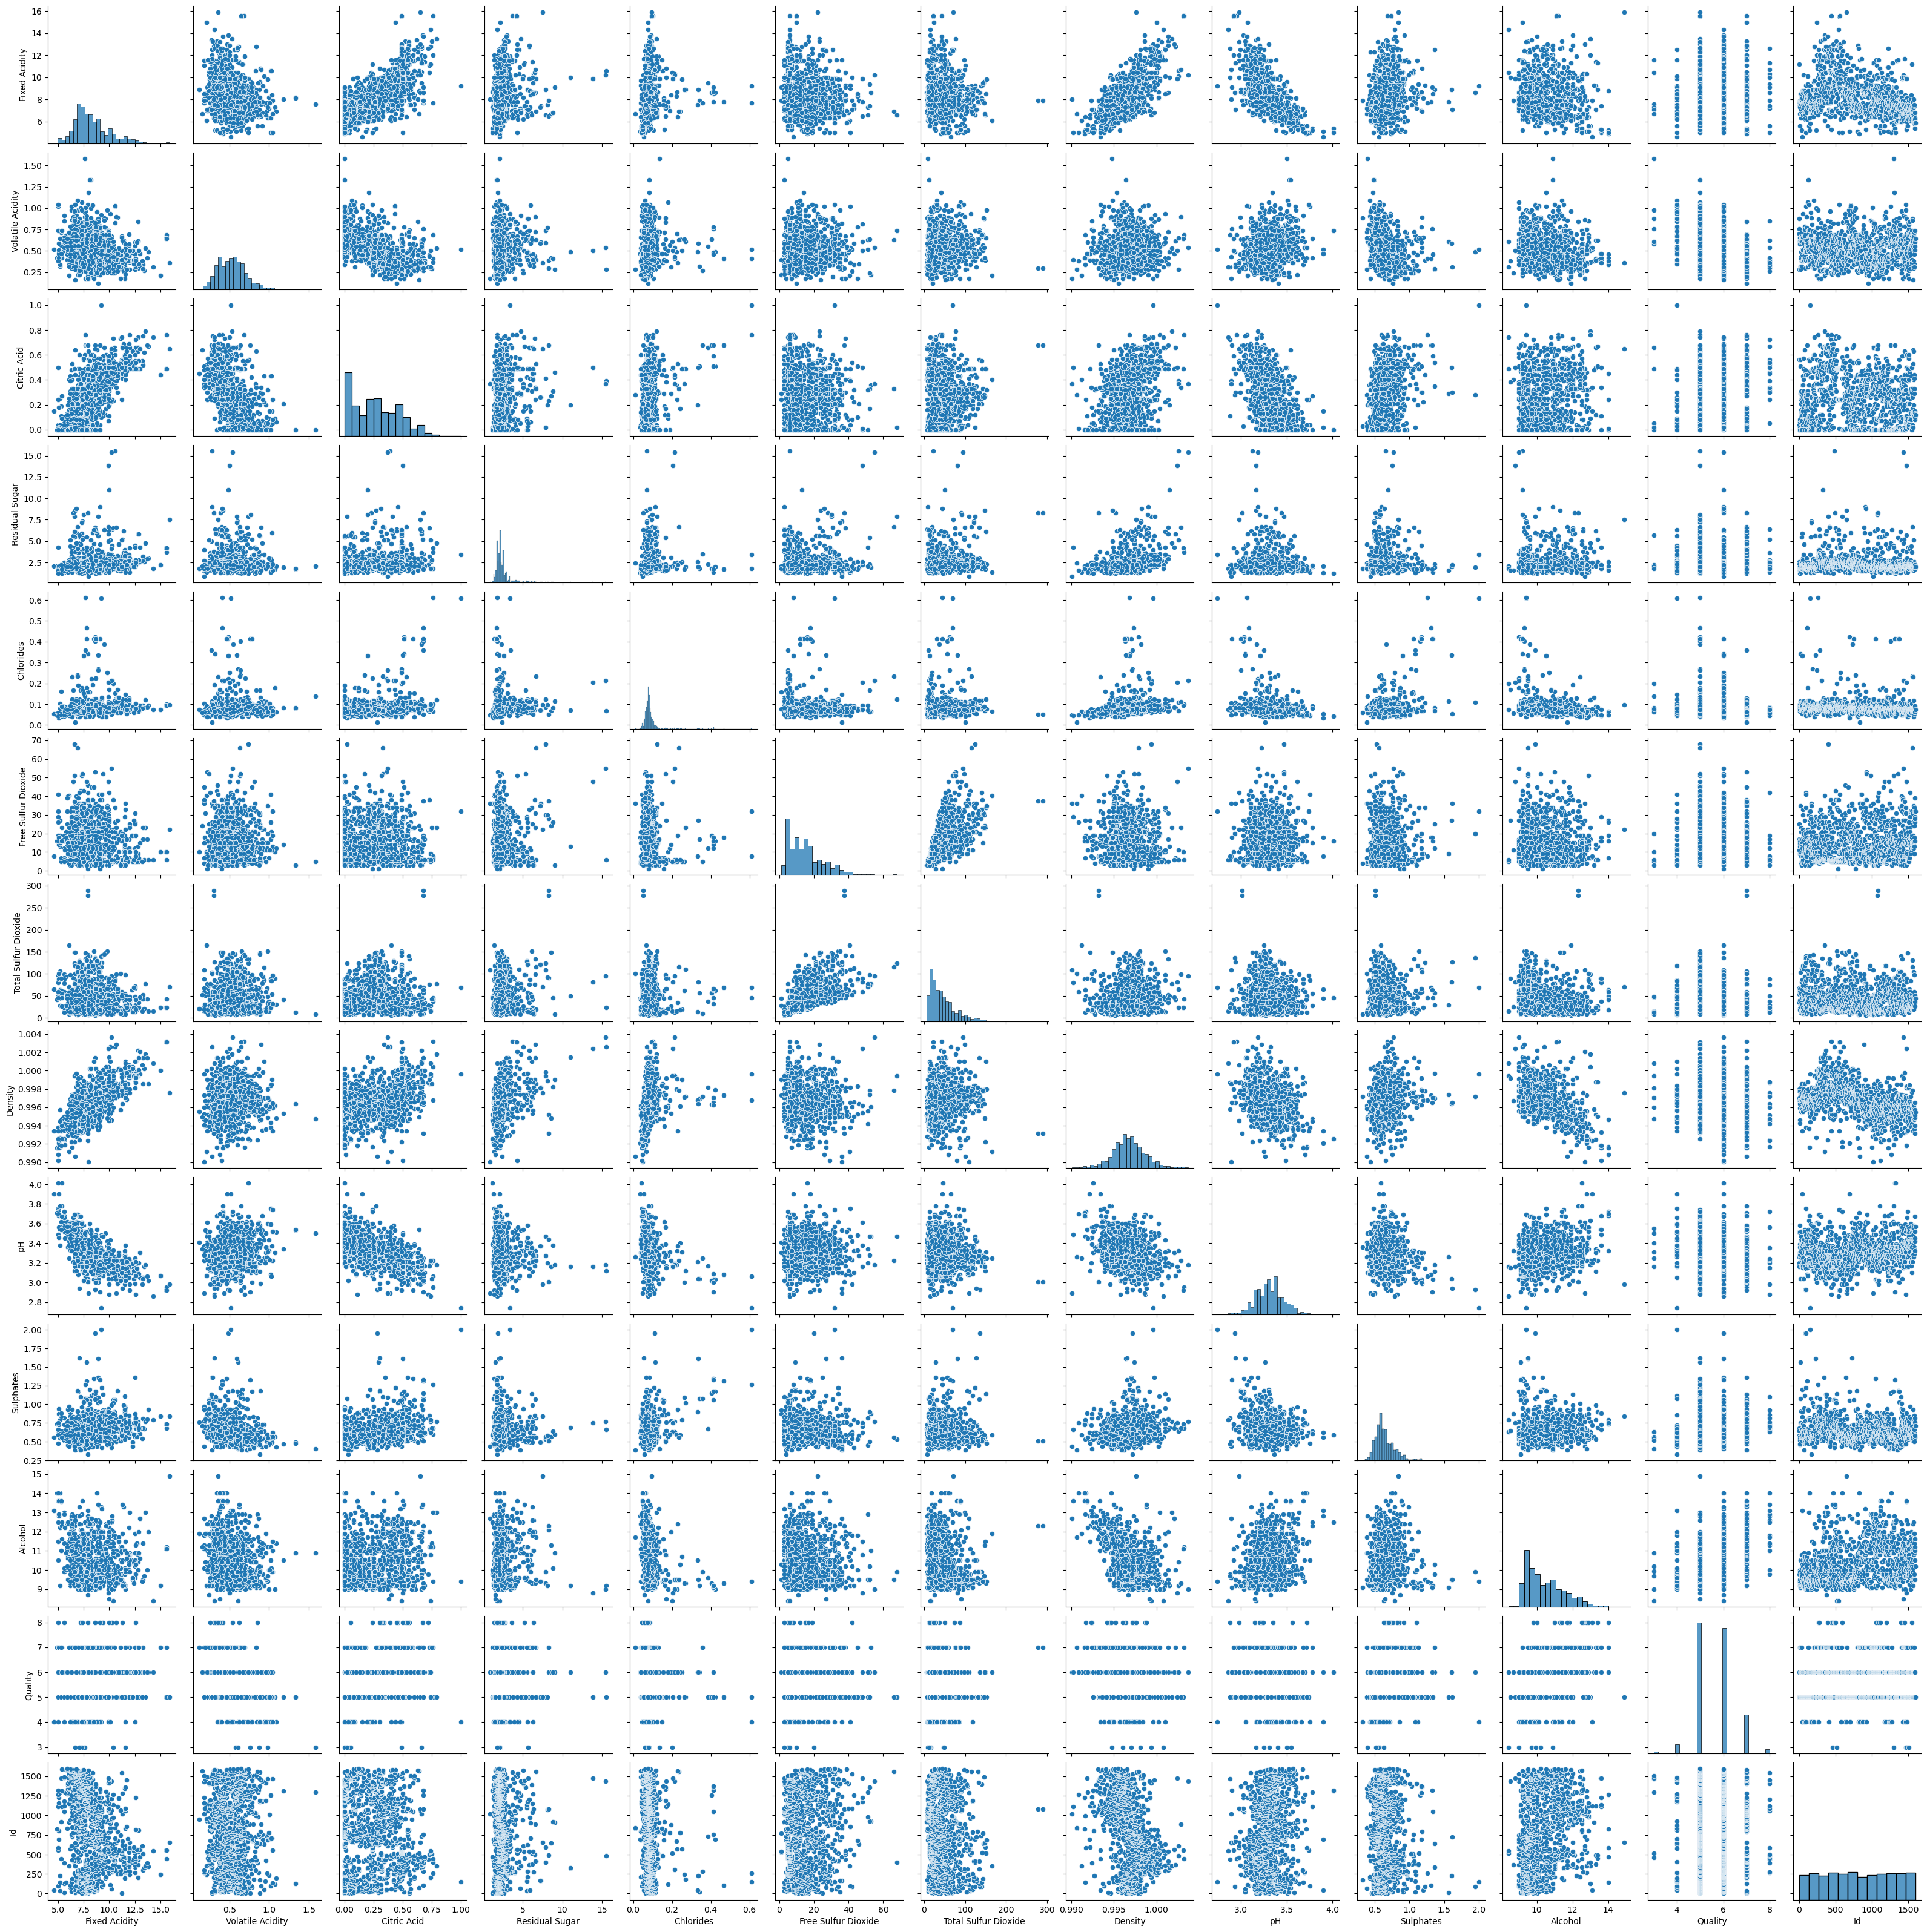

In [10]:
sns.pairplot(data = wine)

In [11]:
# Specifying columns for features and target variable
features = ["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar",
            "Chlorides", "Free Sulfur Dioxide", "Total Sulfur Dioxide", "Density",
            "pH", "Sulphates", "Alcohol"]
target = "Quality"

In [12]:
# Separate features (X) and target variable (y)
X = wine[features]
y = wine[target]

In [13]:
# Splitting the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Building and Training Classifier Models Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
# Stochastic Gradient Descent Classifier
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)

SGDClassifier()

In [16]:
# Support Vector Classifier (SVC)
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)

SVC()

In [17]:
# Making Predictions
# Random Forest predictions
rf_predictions = rf_classifier.predict(X_test)

In [18]:
# SGD Classifier predictions
sgd_predictions = sgd_classifier.predict(X_test)

In [19]:
# SVC predictions
svc_predictions = svc_classifier.predict(X_test)

In [20]:
# Evaluate the Models
# Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.6943231441048034
Random Forest Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.81      0.76        96
           6       0.66      0.67      0.66        99
           7       0.71      0.58      0.64        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.42      0.41      0.41       229
weighted avg       0.67      0.69      0.68       229



C:\Users\kchuc\anaconda3\envs\pandas_playground\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kchuc\anaconda3\envs\pandas_playground\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kchuc\anaconda3\envs\pandas_playground\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [21]:
# SGD Classifier
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
print(f"\nSGD Classifier Accuracy: {sgd_accuracy}")
print("SGD Classifier Classification Report:")
print(classification_report(y_test, sgd_predictions))


SGD Classifier Accuracy: 0.5982532751091703
SGD Classifier Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.62      0.83      0.71        96
           6       0.58      0.58      0.58        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         2

    accuracy                           0.60       229
   macro avg       0.24      0.28      0.26       229
weighted avg       0.51      0.60      0.55       229



C:\Users\kchuc\anaconda3\envs\pandas_playground\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kchuc\anaconda3\envs\pandas_playground\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kchuc\anaconda3\envs\pandas_playground\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [22]:
# SVC
svc_accuracy = accuracy_score(y_test, svc_predictions)
print(f"\nSupport Vector Classifier (SVC) Accuracy: {svc_accuracy}")
print("SVC Classification Report:")
print(classification_report(y_test, svc_predictions))


Support Vector Classifier (SVC) Accuracy: 0.5633187772925764
SVC Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.43      0.54        96
           6       0.51      0.88      0.64        99
           7       1.00      0.04      0.07        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.45      0.27      0.25       229
weighted avg       0.64      0.56      0.51       229



C:\Users\kchuc\anaconda3\envs\pandas_playground\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kchuc\anaconda3\envs\pandas_playground\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kchuc\anaconda3\envs\pandas_playground\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap